In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten



In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

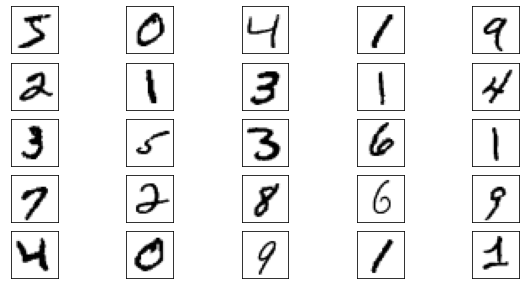

In [13]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()




In [14]:
model = keras.Sequential([ 
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2918 - accuracy: 0.9170 - val_loss: 0.1551 - val_accuracy: 0.9558
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1274 - accuracy: 0.9631 - val_loss: 0.1122 - val_accuracy: 0.9671
Epoch 3/5
1500/1500 [==============================] - 1s 998us/step - loss: 0.0878 - a

[0.08260676264762878, 0.9728000164031982]

[[3.95838742e-06 1.01172235e-08 4.05762512e-06 1.44600187e-06
  9.97965574e-01 1.22147583e-07 1.81378266e-06 4.63510078e-05
  1.55235684e-05 1.96116208e-03]]
распзнанная цифра :4


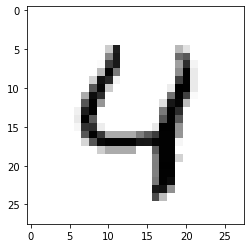

In [18]:

n = 4
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print(f"распзнанная цифра :{np.argmax(res) }" )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


[ True  True  True  True  True  True  True  True False  True]
(269, 28, 28)


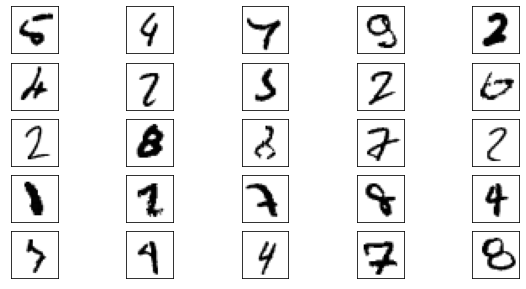

In [10]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()